In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [2]:
data_rnn = pd.read_csv("https://raw.githubusercontent.com/t0ccata/final-project-ml/main/archive/daily/AALI.csv")
data_rnn['timestamp'] = pd.to_datetime(data_rnn['timestamp'])
data_rnn.set_index('timestamp', inplace=True)
data_rnn.head()

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,524,524,547,547,342131
2001-04-17,547,524,571,524,345804
2001-04-18,547,524,547,524,230361
2001-04-19,524,500,524,500,457574
2001-04-20,476,452,476,452,228262


In [3]:
data_rnn.isna().sum()

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [4]:
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i + seq_length].values)
        targets.append(data.iloc[i + seq_length, 3])  # Close price is the target
    return np.array(sequences), np.array(targets)

seq_length = 60

In [5]:
train_size = int(len(data_rnn) * 0.8)
data_train, data_test = data_rnn[:train_size], data_rnn[train_size:]

In [6]:
X_train, y_train = create_sequences(data_train, seq_length)
X_test, y_test = create_sequences(data_test, seq_length)

In [7]:
train_val_split = int(len(X_train) * 0.8)
X_train_final, X_val = X_train[:train_val_split], X_train[train_val_split:]
y_train_final, y_val = y_train[:train_val_split], y_train[train_val_split:]

In [8]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
history = model.fit(X_train_final, y_train_final, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
112/112 [==============================] - 7s 40ms/step - loss: 253263520.0000 - val_loss: 254448528.0000
Epoch 2/20
112/112 [==============================] - 3s 27ms/step - loss: 253058080.0000 - val_loss: 254252848.0000
Epoch 3/20
112/112 [==============================] - 3s 26ms/step - loss: 252897456.0000 - val_loss: 254067664.0000
Epoch 4/20
112/112 [==============================] - 3s 31ms/step - loss: 252746400.0000 - val_loss: 253886000.0000
Epoch 5/20
112/112 [==============================] - 4s 36ms/step - loss: 252595008.0000 - val_loss: 253705488.0000
Epoch 6/20
112/112 [==============================] - 3s 26ms/step - loss: 252441120.0000 - val_loss: 253524960.0000
Epoch 7/20
112/112 [==============================] - 5s 45ms/step - loss: 252295200.0000 - val_loss: 253345824.0000
Epoch 8/20
112/112 [==============================] - 5s 41ms/step - loss: 252142288.0000 - val_loss: 253168560.0000
Epoch 9/20
112/112 [==============================] - 3s 26ms/st

In [11]:
train_predictions = model.predict(X_train_final)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

34/34 [==============================] - 0s 8ms/step


In [12]:
mse_train = mean_squared_error(y_train_final, train_predictions)
mape_train = mean_absolute_percentage_error(y_train_final, train_predictions)
r2_train = r2_score(y_train_final, train_predictions)

In [13]:
print(f'Training Data Metrics:')
print(f'MSE: {mse_train}')
print(f'MAPE: {mape_train}')
print(f'R2 Score: {r2_train}')

Training Data Metrics:
MSE: 250300507.3910511
MAPE: 0.9719335360167851
R2 Score: -2.0740017714095984


In [14]:
mse_val = mean_squared_error(y_val, val_predictions)
mape_val = mean_absolute_percentage_error(y_val, val_predictions)
r2_val = r2_score(y_val, val_predictions)

In [15]:
print(f'Validation Data Metrics:')
print(f'MSE: {mse_val}')
print(f'MAPE: {mape_val}')
print(f'R2 Score: {r2_val}')


Validation Data Metrics:
MSE: 251048236.4135479
MAPE: 0.9920551427483966
R2 Score: -29.487876464921452


In [16]:
mse_test = mean_squared_error(y_test, test_predictions)
mape_test = mean_absolute_percentage_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

In [17]:
print(f'Test Data Metrics:')
print(f'MSE: {mse_test}')
print(f'MAPE: {mape_test}')
print(f'R2 Score: {r2_test}')

Test Data Metrics:
MSE: 106315246.70522903
MAPE: 0.987731629493131
R2 Score: -30.187841847845394


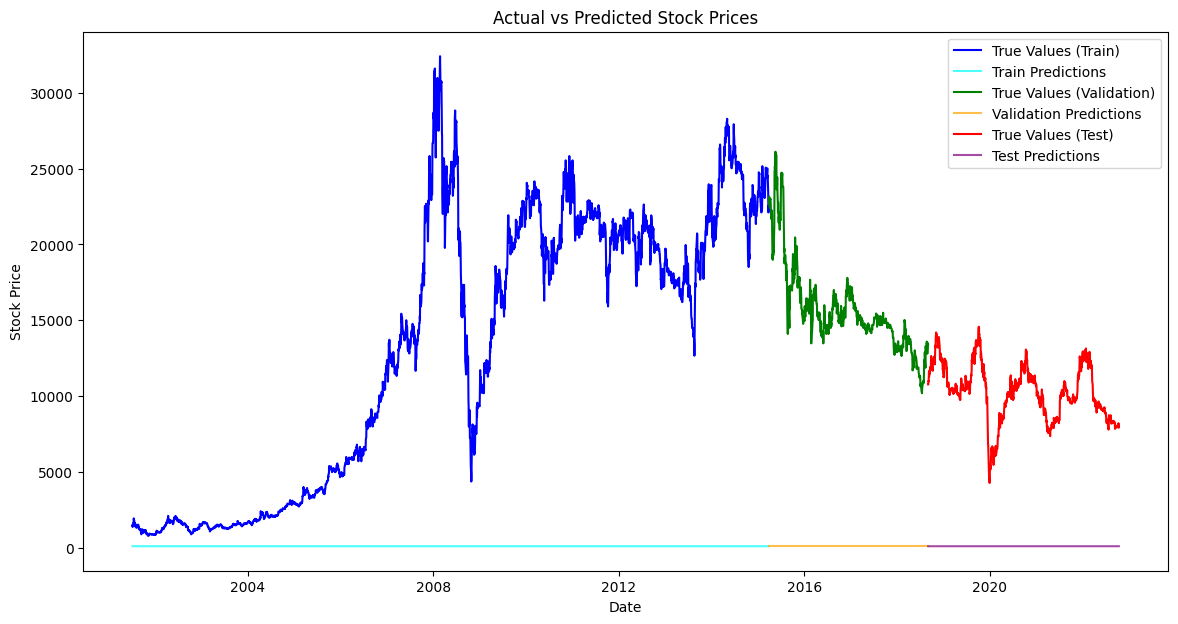

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(data_train.index[seq_length:seq_length + len(y_train_final)], y_train_final, label='True Values (Train)', color='blue')
plt.plot(data_train.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', color='cyan', alpha=0.7)
plt.plot(data_train.index[seq_length + len(y_train_final):seq_length + len(y_train_final) + len(y_val)], y_val, label='True Values (Validation)', color='green')
plt.plot(data_train.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(val_predictions)], val_predictions, label='Validation Predictions', color='orange', alpha=0.7)
plt.plot(data_test.index[:len(y_test)], y_test, label='True Values (Test)', color='red')
plt.plot(data_test.index[:len(test_predictions)], test_predictions, label='Test Predictions', color='purple', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()